# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari *Kaggle* : https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset
2. **Deskripsi Dataset**:
   Dataset ini memuat data biaya asuransi kesehatan dari 1.338 peserta. Informasi yang tersedia mencakup berbagai variabel demografis dan faktor kesehatan, seperti umur, jenis kelamin, indeks massa tubuh (BMI), jumlah tanggungan anak, status merokok, serta lokasi tempat tinggal di wilayah Amerika Serikat.
   Variabel utama yang menjadi target analisis adalah charges, yaitu total biaya asuransi medis yang dibebankan kepada tiap individu.
   Potensi pemanfaatan dari dataset sebagai berikut:
    *  Membuat model prediksi biaya pengobatan
    *  Menelusuri pengaruh BMI dan kebiasaan merokok terhadap biaya asuransi
    *  Mengajarkan konsep regresi dan teknik rekayasa fitur
    *  Menganalisis pola keterjangkauan layanan kesehatan
3. **Deskripsi kolom**: Adapun penjelasan dari tiap kolom yang terdapat dalam dataset yaitu sebagai berikut
    *  age: Umur peserta utama (integer)
    *  sex: Jenis kelamin peserta (male/female)
    *  bmi: Indeks Massa Tubuh, indikator komposisi lemak berdasarkan tinggi dan berat (float)
    *  children: Jumlah anak yang ditanggung dalam polis asuransi (integer)
    *  smoker: Kondisi apakah peserta merokok (yes/no)
    *  region: Area domisili dalam wilayah AS (northeast, northwest, southeast, southwest)
    *  charges: Total biaya asuransi medis yang dikenakan (float)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Memuat dataset
df = pd.read_csv("/content/insurance-raw.csv")

In [5]:
# Menampilkan 10 baris pertama dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Menampilkan informasi ringkas tentang struktur DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Menampilkan deskripsi statistik dari dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Memeriksa missing value
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
# Memeriksa data duplikat
df.duplicated().sum()

np.int64(1)

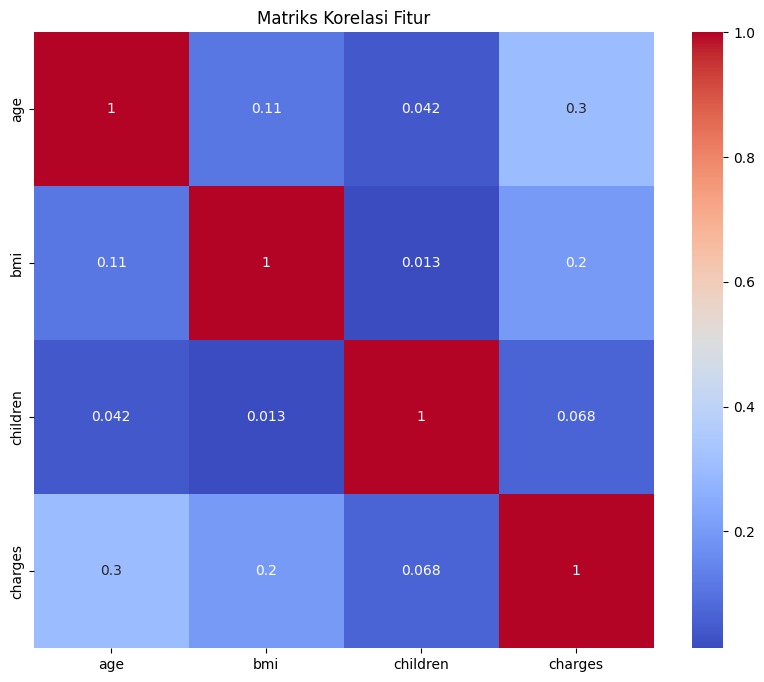

In [10]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
# Drop the non-numeric 'label' column before calculating correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
# Menghapus atau Menangani Data Kosong (Missing Values)
df = df.dropna()

In [12]:
# Menghapus Data Duplikat
df = df.drop_duplicates()

In [13]:
# Melakukan Normalisasi atau Standarisasi Fitur
categirical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
target_col = 'charges'

numerical_cols = numerical_cols.drop(target_col)

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
# Mendeteksi dan penanganan outlier
for feature in numerical_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [15]:
# Encoding Data Kategorikal
df = pd.get_dummies(df, columns=categirical_cols,dtype=int)

In [16]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,1,0,0,1,0,0,0,1
1,0.000000,0.479150,0.2,1725.55230,0,1,1,0,0,0,1,0
2,0.217391,0.458434,0.6,4449.46200,0,1,1,0,0,0,1,0
3,0.326087,0.181464,0.0,21984.47061,0,1,1,0,0,1,0,0
4,0.304348,0.347592,0.0,3866.85520,0,1,1,0,0,1,0,0
